# Tips Dataset Explored


### Fundamentals of Data Analysis Assessment 2019

In [1]:
import seaborn as sns # Importing the required libraries and give them a shorter name.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# import warnings
# warnings.filterwarnings("ignore") # Added this code at the end, to make the notebook more visually attractive. https://exploredatalab.com/how-to-suppress-warnings-in-jupyter-notebook/

In [2]:
 tips = sns.load_dataset("tips") # Import the dataset we will be working with.

## Part 1: Tips Dataset Described

First, let's have a look at the dataset we will be looking into:

In [3]:
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
5,25.29,4.71,Male,No,Sun,Dinner,4
6,8.77,2.00,Male,No,Sun,Dinner,2
7,26.88,3.12,Male,No,Sun,Dinner,4
8,15.04,1.96,Male,No,Sun,Dinner,2
9,14.78,3.23,Male,No,Sun,Dinner,2


First of all, the last few entries look perfect, so it seems there is no missing data in this dataset. The dataset consists of 244 rows and 7 columns. 244 people (and their party) have enjoyed food and drinks in the restaurant and paid their bill. This dataset shows us the size of their tip, and 6 other variables which may influence this tip. Let's have a look at those 6 variables:


**Total_bill** is a float, which tells us the total bill that was to be paid. Total_bill ranges from a minimum of 3.07 dollars to a maximum of 50.81 dollars, with a mean of 19.78 dollars. Let's visualize the data for this variable with a plot:

C:\Users\Arnoud\Anaconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


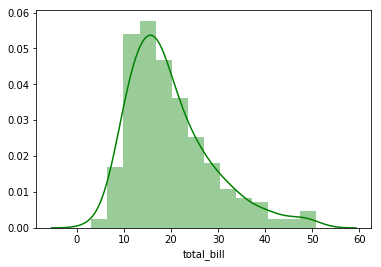

In [4]:
sns.distplot(tips["total_bill"], color="g"); # Plot a distplot of variable total_bill in green.

The **sex** variable tells us whether the person who paid was male or female. This variable only has 2 possible values.

In [5]:
# First I read in the raw dataset as "df" to make it easier to extract data from the set.
df = pd.read_csv("https://raw.githubusercontent.com/pandas-dev/pandas/master/doc/data/tips.csv")
print ("Total amount of male tippers = ", df.sex[df.sex == "Male"].count())
print ("Total amount of females tippers = ", df.sex[df.sex == "Female"].count())

Total amount of male tippers =  157
Total amount of females tippers =  87


The third variable that was recorded is whether the person was a **smoker** or not. This variable again can only have 2 values: yes or no.

In [6]:
print ("Total amount of smoking tippers = ", df.smoker[df.smoker == "Yes"].count())
print ("Total amount of non-smoking tippers = ", df.smoker[df.smoker == "No"].count())

Total amount of smoking tippers =  93
Total amount of non-smoking tippers =  151


The **day** variable shows us what day of the week it was when the tip was given. The only days mentioned here are Thursday, Friday, Saturday and Sunday. The restaurant might have been closed the other 3 days, or perhaps there was no data collection on the those days. Let's visualize how often each day is represented in the tips dataset:

In [7]:
print ("Total amount of Thursdays in this dataset = ", df.day[df.day == "Thur"].count()) # https://stackoverflow.com/questions/35277075/python-pandas-counting-the-occurrences-of-a-specific-value
print ("Total amount of Fridays in this dataset = ", df.day[df.day == "Fri"].count())
print ("Total amount of Saturdays in this dataset = ", df.day[df.day == "Sat"].count())
print ("Total amount of Sundays in this dataset = ", df.day[df.day == "Sun"].count())

Total amount of Thursdays in this dataset =  62
Total amount of Fridays in this dataset =  19
Total amount of Saturdays in this dataset =  87
Total amount of Sundays in this dataset =  76


In [8]:
Thursdays = df.day[df.day == "Thur"].count() # 
Fridays = df.day[df.day == "Fri"].count()
Saturdays = df.day[df.day == "Sat"].count()
Sundays = df.day[df.day == "Sun"].count()

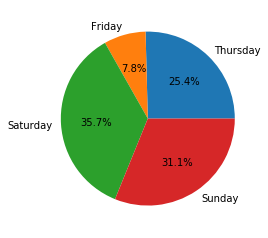

In [9]:
a = ([Thursdays, Fridays, Saturdays, Sundays]) #learned about pie chart here: https://pythonspot.com/matplotlib-pie-chart/
labels = "Thursday", "Friday", "Saturday", "Sunday"
plt.pie(a,labels = labels, autopct ="%1.1f%%");

The **time** variable tells us if it was a lunch or a dinner that was paid for. Again, only 2 possible values here.

In [10]:
print ("Amount of lunch tips = ", df.time[df.time == "Lunch"].count())
print ("Amount of dinner tips = ", df.time[df.time == "Dinner"].count())

Amount of lunch tips =  68
Amount of dinner tips =  176


And lastly, **size** tells us the size of the party for which the person was paying. As can be seen in the array below: the smallest value here is 1, while the biggest party consisted of 6 people, and the mean is 2.57.

In [11]:
partysize = df['size'].value_counts(); # https://stackoverflow.com/questions/22391433/count-the-frequency-that-a-value-occurs-in-a-dataframe-column/36434248

In [12]:
partysize

2    156
3     38
4     37
5      5
6      4
1      4
Name: size, dtype: int64

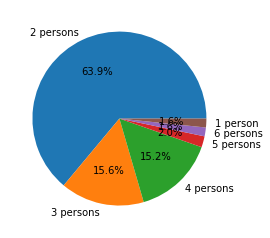

In [13]:
labels = "2 persons", "3 persons", "4 persons", "5 persons", "6 persons", "1 person"
plt.pie(partysize, labels = labels, autopct ="%1.1f%%");

By far the most common size of the party was 2, followed by 3 and 4. Parties of 1,5 and 6 were rare.

In [53]:
tips.describe() # This function quickly shows an overview of the numeric variables in the dataset.

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


Panda's <em>describe</em> function, quickly gives us an idea. The mean (average) total bill appears to be just under 20 dollars and the mean tip about 3 dollars. The median total bill and tip are both fairly close to the mean, which would suggest a fairly symmetrical distribution. The biggest tip was 10 dollars, and the smallest tip 1 dollar. Interesting to note is the fact that every single person who paid their bill, also gave a tip. This might be normal in the US, but this probably would not be the case over here in Ireland.

All in all, this is a potentially interesting dataset. In my opinion, it could have been even better if they had asked the people paying how they would rate the service. Then we could have investigated if there is a correlation between tip size and service provided; something I believe is not as obvious as people might think it is. Anyway, this is for another time. Let's now focus on possible correlations between the variables used in this dataset.

## Part 2: Possible relationship between total bill and tip

### 2.1 Correlation between total bill and tip

In this part I am going to have a look at the possible relationship between the total bill and the tip that was left. To do this I will visualise the relationship and explain in detail how the two variables are (possibly) related.

Below is a scatterplot with the total bill on the x-axis, and the tip size on the y-axis.

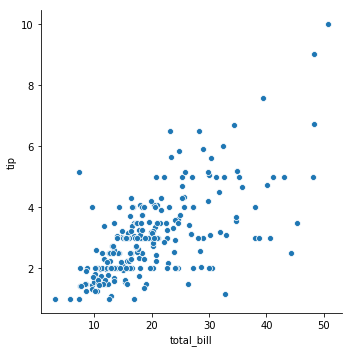

In [15]:
sns.relplot(x="total_bill", y="tip", data=tips);

This scatterplot gives us a first idea of what the relationship might be. It looks like, on average, the higher the bill, the higher the tip will be. This is because, the further to the right of the x-axis you look, the higher the dots are on the y-axis. Of course there are some exceptions, but the correlation seems to be pretty strong.

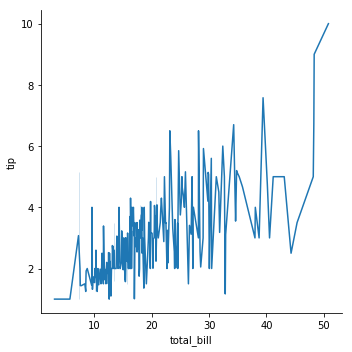

In [16]:
sns.relplot(x="total_bill", y="tip", kind="line", data=tips);

The above lineplot, while clearly not as suitable as the scatterplot, still shows us in the blink of an eye, the trend of the higher the bill, the higher the tip.

I am now going to divide the <em> tips </em> dataset into 3 subsets. These subsets are: **lowbills** from 0 to 13 dollar, **avgbills**, from 13.01 till 19 dollars, and **bigbills**, higher than 19 dollars. After looking at the correlation between the total bill and the tip size, I want to have a look at the possible correlation between total bill and tip percentage. 

To do this, I will generate a new dataframe **billtip** with variables <em>total_bill</em>, <em>tip</em>, and <em>tip_percentage</em>. 

In [17]:
df = pd.read_csv("https://raw.githubusercontent.com/pandas-dev/pandas/master/doc/data/tips.csv") # Reading the tips dataset from github to be used as a dataframe

In [18]:
billtip = df[["total_bill", "tip"]] # Only use the "total_bill" and "tip" columns.

In [19]:
billtip["tip_percentage"] = billtip["tip"]/df["total_bill"] # Adding a new column with tip_percentage, which I will use later. Used this link: https://stackoverflow.com/questions/36619631/how-to-divide-two-column-in-a-dataframe

C:\Users\Arnoud\Anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [20]:
billtip

,total_bill,tip,tip_percentage
0,16.99,1.01,0.059447
1,10.34,1.66,0.160542
2,21.01,3.50,0.166587
3,23.68,3.31,0.139780
4,24.59,3.61,0.146808
5,25.29,4.71,0.186240
6,8.77,2.00,0.228050
7,26.88,3.12,0.116071
8,15.04,1.96,0.130319
9,14.78,3.23,0.218539


Now, I am going to use the <em>between</em> function to select only the **lowbills** between 0 and 12 dollars. I used this link to learn about this: https://stackoverflow.com/questions/31617845/how-to-select-rows-in-a-dataframe-between-two-values-in-python-pandas/40442778

In [40]:
lowbills = billtip[df['total_bill'].between(0, 12)]

The second subset of data consists of the **avgbills** between 12.01 (to prevent possible overlap with group 1) and 24 dollar:

In [42]:
avgbills = billtip[df['total_bill'].between(12.01, 24)]

And the last subset **bigbills** consists of all bills higher than 24 dollar

In [44]:
bigbills = billtip[df['total_bill'].between(24.01, 51)] # in tips.describe I could see the max bill was just over 50 dollars, so I can use 51 as the highest value.

Let's visualize these 3 datasets: 

Text(0.5, 1.0, 'Bills higher than 24 dollars')

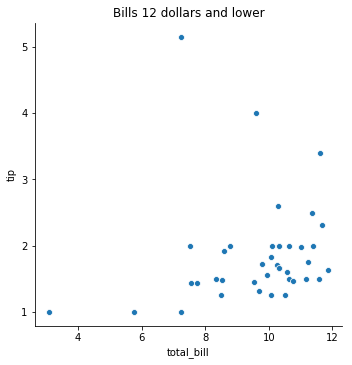

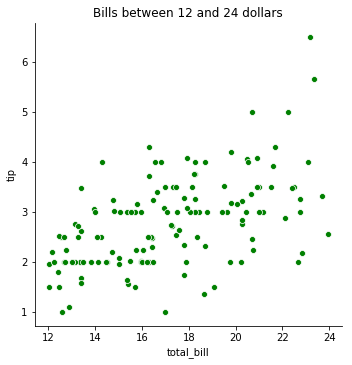

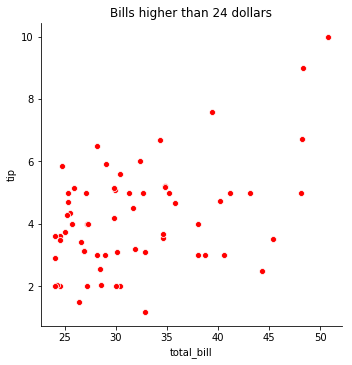

In [57]:
sns.relplot(x="total_bill", y="tip", data=lowbills)
plt.title("Bills 12 dollars and lower") # Learned about giving titles to plot in seaborn here: https://stackoverflow.com/questions/29813694/how-to-add-a-title-to-seaborn-facet-plot
sns.relplot(x="total_bill", y="tip", data=avgbills, color="g")
plt.title("Bills between 12 and 24 dollars")
sns.relplot(x="total_bill", y="tip", data=bigbills, color="r")
plt.title("Bills higher than 24 dollars")

Looking at these scatterplots, again there is a clear correlation, in every category, between <em>total_bill</em> and <em>tip</em>. As the values on the x-axis get bigger, so (on average) do the values on the y-axis. This was to be expected of course, so now I want to know if there is also a correlation between the <em>total_bill</em> and the <em>tip_percentage</em>.

### 2.2 Correlation between total bill and tip percentage

In [49]:
billtip.describe()

,total_bill,tip,tip_percentage
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,0.160803
std,8.902412,1.383638,0.061072
min,3.070000,1.000000,0.035638
25%,13.347500,2.000000,0.129127
50%,17.795000,2.900000,0.154770
75%,24.127500,3.562500,0.191475
max,50.810000,10.000000,0.710345


Before I look for possible correlations, I first want to have a look at the data in the <em>tip_percentage</em> column. A few things stand out. The mean and the median are very close, which shows me this variable probably has a pretty symmetrical distribution. However, there is a maximum tip of 71 percent, which, with a mean of 16, seems very extreme. Let's plot the data and see what else we can find out.

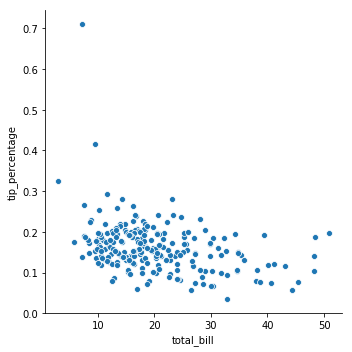

In [29]:
sns.relplot(x="total_bill", y="tip_percentage", data=billtip);

The scatterplot shown above shows us the possible correlation between <em>total bill</em> and <em>tip percentage</em>. 
There seems to be a small negative correlation, as the tips get relatively smaller as the bills get bigger.

Let's have a look at the possible correlation between <em>total bill</em> and <em>tip percentage</em> for each of the 3 groups of data I created from the main tips dataset.

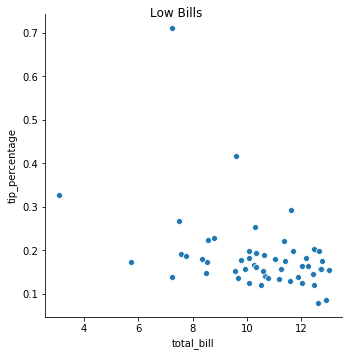

In [30]:
a = sns.relplot(x="total_bill", y="tip_percentage", data=lowbills)
a.fig.suptitle("Low Bills"); # https://stackoverflow.com/questions/29813694/how-to-add-a-title-to-seaborn-facet-plot

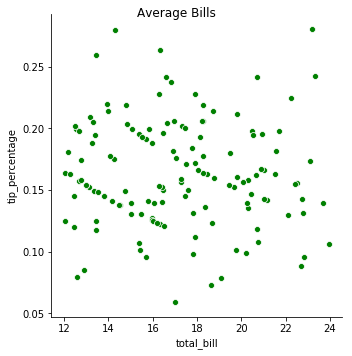

In [54]:
b = sns.relplot(x="total_bill", y="tip_percentage", data=avgbills, color="g")
b.fig.suptitle("Average Bills");

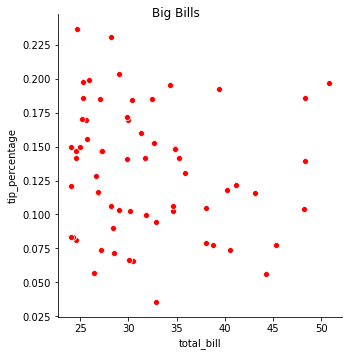

In [55]:
c = sns.relplot(x="total_bill", y="tip_percentage", data=bigbills, color="r")
c.fig.suptitle("Big Bills");

The strongest negative correlation can be seen in the **lowbills** group. A slightly less strong, but still clear correlation can be seen for the 2 other groups. 

In [33]:
lowbills.describe()

,total_bill,tip,tip_percentage
count,56.000000,56.000000,56.000000
mean,10.470357,1.878393,0.186293
std,2.018978,0.707559,0.089936
min,3.070000,1.000000,0.079365
25%,9.660000,1.495000,0.146367
50%,10.610000,1.780000,0.170107
75%,12.062500,2.000000,0.194576
max,13.000000,5.150000,0.710345


In [34]:
avgbills.describe()

,total_bill,tip,tip_percentage
count,84.000000,84.000000,84.000000
mean,16.037143,2.676786,0.167188
std,1.704505,0.737289,0.043139
min,13.030000,1.010000,0.059447
25%,14.677500,2.000000,0.138026
50%,16.240000,2.625000,0.161261
75%,17.480000,3.100000,0.199991
max,18.780000,4.300000,0.279525


In [35]:
bigbills.describe()

,total_bill,tip,tip_percentage
count,104.000000,104.000000,104.000000
mean,27.829904,3.860962,0.141919
std,7.647318,1.514479,0.047268
min,19.080000,1.170000,0.035638
25%,21.670000,3.000000,0.104752
50%,25.425000,3.500000,0.142823
75%,31.745000,5.000000,0.170677
max,50.810000,10.000000,0.280535


What can be seen from above arrays is that the mean tip percentage gets lower, as the bills get higher. For **lowbills** the mean tip percentage is 18.6%, for **avgbills** 16.7%, and for **bigbills** this percentage is 14.2%.

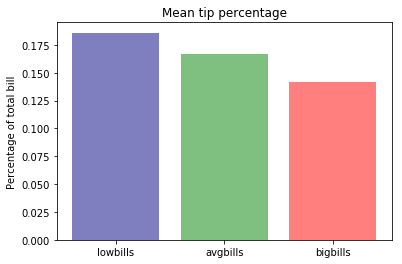

In [69]:
objects = ("lowbills", "avgbills", "bigbills") # https://pythonspot.com/matplotlib-bar-chart/
meantippct = [0.186, 0.167, 0.142]
yheight = np.arange(len(objects))

plt.bar(yheight,meantippct, align='center', alpha=0.5, color=("navy", "green", "red"))
plt.xticks(yheight, objects)
plt.ylabel('Percentage of total bill')
plt.title("Mean tip percentage")

plt.show()

All in all, 